#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

#### Data Importation

In [2]:
product_detail = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\product_details.csv")
store_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weekly_sales.csv")

##### Data Details

In [3]:
# Product details 
pd.concat([product_detail.head(), product_detail.tail()])

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7
43,1043,English Breakfast Tea 80bags,Beverages,246,9
44,1044,Sparkling Water 1L,Beverages,186,1
45,1045,Lemonade 2L,Beverages,356,9
46,1046,Protein Shake 4-pack,Beverages,158,8
47,1047,Green Tea 40bags,Beverages,92,3


In [4]:
# Store_info data
pd.concat([store_info.head(), store_info.tail()])

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330
10,510,North East,3000,784
11,511,South West,3000,634
12,512,South East,5000,1697
13,513,South West,4000,1322
14,514,South West,3000,1001


In [5]:
# Supplier_info data
pd.concat([supplier_info.head(), supplier_info.tail()])

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306
5,6,OrganicChoice Partners,2,31776
6,7,SwiftDelivery Foods UK,2,59474
7,8,TrustedSource Provisions,3,46959
8,9,GreenValley Suppliers,3,54320
9,10,BestQuality Foods Ltd.,2,53748


In [6]:
# Weather data
pd.concat([weather_data.head(), weather_data.tail()])

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1
359,2024-W52,North West,7.4,17.2,1
360,2024-W52,London,11.6,10.4,1
361,2024-W52,South West,8.7,16.2,1
362,2024-W52,North East,5.2,19.2,1
363,2024-W52,Wales,9.6,12.8,1


In [7]:
# Weekly sales data
pd.concat([weekly_sales.head(), weekly_sales.tail()])

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46
37435,2024-W52,1043,514,895,488.97,15,22,1.62
37436,2024-W52,1044,514,1558,657.76,10,38,5.05
37437,2024-W52,1045,514,993,442.56,0,24,5.72
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82
37439,2024-W52,1047,514,658,940.83,0,16,4.37


#### Exploratory Data Analysis Stage 1

In [8]:
def Eda_Stage_1(data, name):
  print("="*100)
  print(f"{name} dataset information")
  print(data.info())
  print("="*100)
  print(f"{name} dataset shape")
  print(data.shape)
  print("="*100)
  print(f"{name} dataset description")
  print(data.describe())
  print("="*100)
  print(f"{name} dataset columns")
  print(data.columns)
  print("="*100)
  print(f"{name} dataset missing values")
  print(data.isna().sum())
  print("="*100)
  print(f"{name} dataset duplicate values")
  print(data.duplicated().sum())

##### Product Details

In [9]:
Eda_Stage_1(product_detail, "product_detail")

product_detail dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
product_detail dataset shape
(48, 5)
product_detail dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.00

##### Store Info

In [10]:
Eda_Stage_1(store_info, "store_info")

store_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None
store_info dataset shape
(15, 4)
store_info dataset description
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.000000             999.500000
50%    507.000000   4000.000000            1086.000000
75%    510.500000   5000.000000            1509.5000

##### Suplier Info

In [11]:
Eda_Stage_1(supplier_info, "supplier_info")

supplier_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None
supplier_info dataset shape
(10, 4)
supplier_info dataset description
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51262.000000
75%        7.75000        2.750000     58185.500000
max       10.00000        3.000000     71976.0000

##### Weather Data

In [12]:
Eda_Stage_1(weather_data, "weather_data")

weather_data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None
weather_data dataset shape
(364, 5)
weather_data dataset description
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12.550000      0.000000
50%           9.700000   18.600000      0.000000
75%          15.525000   27.825000      0.000000
max         

##### Weekly Sales

In [13]:
Eda_Stage_1(weekly_sales, "weekly_sales")

weekly_sales dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None
weekly_sales dataset shape
(37440, 8)
weekly_sales dataset description
         Product_ID      Store_ID    Units_Sold  Marketing_Spend  \
count  37440.000000  37440.000000  37440.000000     37440.000000   
mean    1023.500000    507.000000   1642.154087       410.551195   
std       13.853584      4.320551   1166.477872

#### Exploratory Data Analysis Stage 2

In [14]:
(product_detail['Product_Category'].value_counts())

Product_Category
Bakery       12
Meat         12
Dairy        12
Beverages    12
Name: count, dtype: int64

In [15]:
print(f"we have total number of {len(product_detail)} product in the store")
print(f"we have the total number of {len(product_detail['Product_Category'].value_counts())} products type in the store")

we have total number of 48 product in the store
we have the total number of 4 products type in the store


In [16]:
# Based on all the regions
print(f"The sales for 52 weeks is: {len(weekly_sales)}")
print(f"The total number of units sold in {len(weather_data)} days is {weekly_sales['Units_Sold'].sum():,}")
print(f"The total number of units wasted or expired unit in {len(weather_data)} days is {weekly_sales['Wastage_Units'].sum():,}")
print(f"The average number of wasted units is {weekly_sales['Units_Sold'].mean():.2f}")
print(f"The average number of wasted units is {weekly_sales['Wastage_Units'].mean():2f}")

The sales for 52 weeks is: 37440
The total number of units sold in 364 days is 61,482,249
The total number of units wasted or expired unit in 364 days is 4,786,490
The average number of wasted units is 1642.15
The average number of wasted units is 127.844284


#### Regional Store Distribution - BAR CHARTS

In [17]:
store_info['Region'].value_counts()

Region
South West    4
London        3
Midlands      3
North East    2
North West    2
South East    1
Name: count, dtype: int64

#### Sales Performance by Region

Text(0, 0.5, 'Wastage Units')

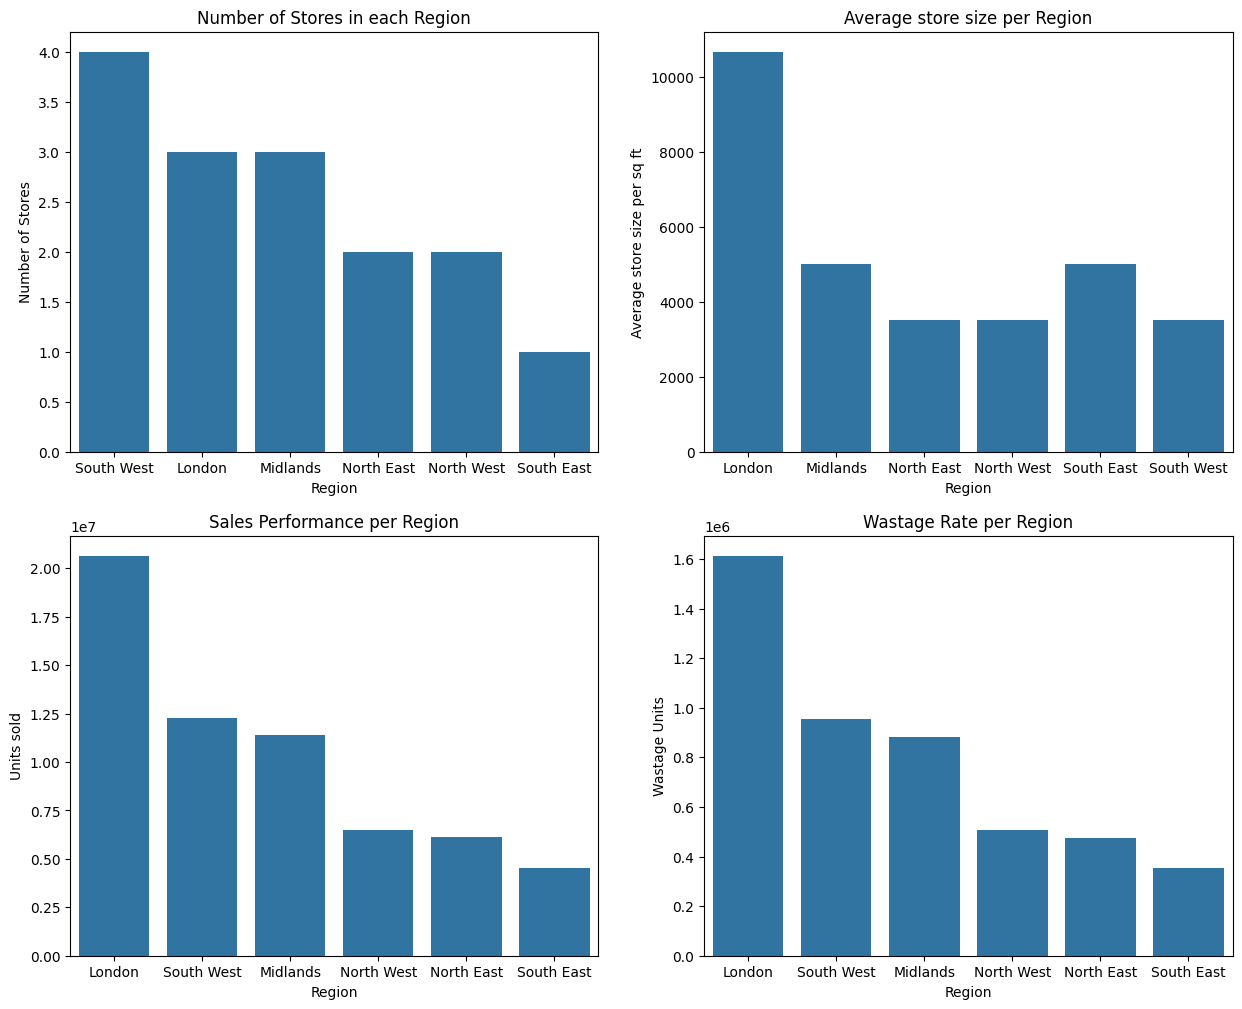

In [18]:
plt.figure(figsize=(15, 12))

# Number of stores in each region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title("Number of Stores in each Region")
plt.xlabel("Region")
plt.ylabel("Number of Stores")

# Average store size per region
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average store size per Region")
plt.xlabel("Region")
plt.ylabel("Average store size per sq ft")

# Sales performance per region
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title("Sales Performance per Region")
plt.xlabel("Region")
plt.ylabel("Units sold")

# Wastage rate per region
plt.subplot(2, 2, 4)
goods_wastage_by_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=goods_wastage_by_region.index, y=goods_wastage_by_region.values)
plt.title("Wastage Rate per Region")
plt.xlabel("Region")
plt.ylabel("Wastage Units")

##### Average price per product across all categories
###### Discount performance

[0 1 2 3 4 5]


C:\Users\akann\AppData\Local\Temp\ipykernel_32444\2291571071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_product_category.index,


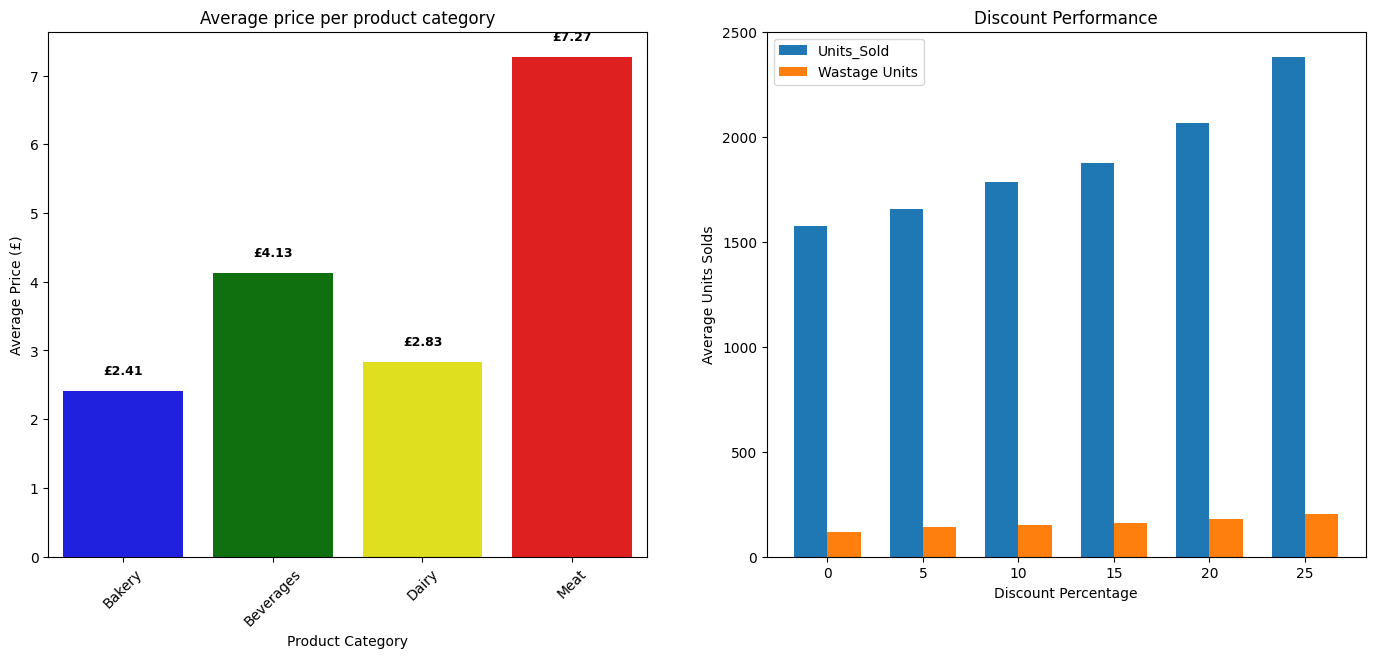

In [19]:
plt.figure(figsize=(17, 15))

plt.subplot(2, 2, 1)
# Average price product across all category
category_price = weekly_sales.merge(product_detail, on='Product_ID')
price_per_product_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_product_category.index,
            y=price_per_product_category.values,
            palette=["blue", "green", "yellow", "red"])
plt.title("Average price per product category")
plt.xlabel("Product Category")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)

for i, (cat, val) in enumerate(zip(price_per_product_category.index, price_per_product_category.values)):
    plt.text(i, val + 0.2, f"£{val:.2f}",
             ha="center", va="bottom", fontweight="bold", fontsize=9)
    
    
# discount performance
# sales performance by each discount percentage

plt.subplot(2, 2, 2)
discount_performance = weekly_sales.groupby("Discount_Percent").agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

x = np.arange(len(discount_performance))
print(x)
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width, label='Units_Sold')
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title("Discount Performance")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Units Solds")
plt.xticks(x, discount_performance['Discount_Percent'])
plt.legend()



#### Sales Performance by Product Category - Comparison Bars

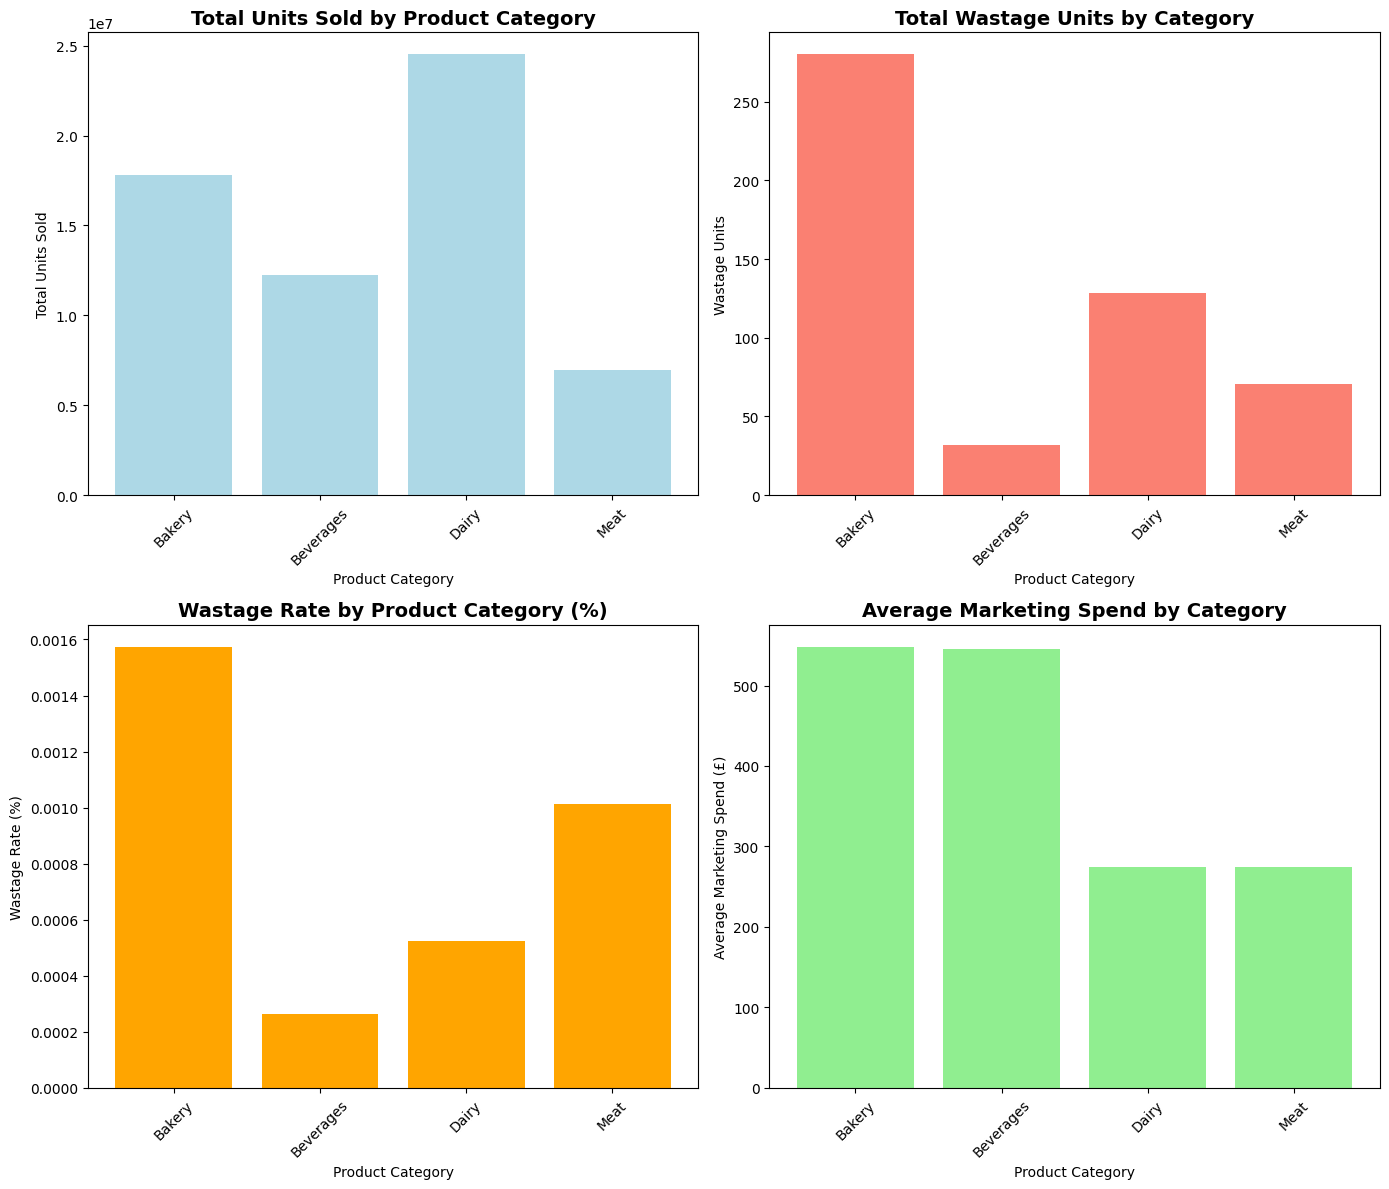

In [20]:
# CATEGORY PERFORMANCE
plt.figure(figsize=(14, 12))

# Merge Sales with Product Details
sales_with_categories = weekly_sales.merge(product_detail, on='Product_ID')

# Calculate metrics by category
category_metrics = sales_with_categories.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Price': 'mean',
    'Wastage_Units': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

plt.subplot(2,2,1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Total Units Sold by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)


plt.subplot(2,2,2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color='salmon')
plt.title('Total Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.subplot(2,2,3)

# Wastage Rate calculation
category_metrics['Wastage_Rate'] = category_metrics['Wastage_Units'] / category_metrics['Units_Sold'] * 100
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Rate'], color='orange')
plt.title('Wastage Rate by Product Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)


# Average marketing funds spent on each product category
plt.subplot(2,2,4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color='lightgreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Best Discount vs. No Discount

In [21]:
# Compare sales at the best discount vs. no discount, and calculate the percentage sales lift
discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 25]
no_discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 0]

discount_units_sold = discount_sales['Units_Sold'].sum()
no_discount_units_sold = no_discount_sales['Units_Sold'].sum()

# Calculate percentage lift
sales_lift = ((discount_units_sold - no_discount_units_sold) / no_discount_units_sold) * 100

print(f"Units Sold with 25% Discount: {discount_units_sold}")
print(f"Units Sold with No Discount: {no_discount_units_sold}")
print(f"Sales Lift at 25% Discount: {sales_lift:.2f}%")

Units Sold with 25% Discount: 2060812
Units Sold with No Discount: 45269818
Sales Lift at 25% Discount: -95.45%


#### STORE EFFICIENCY ANALYSIS

In [22]:
store_category_price = store_info.merge(category_price, on='Store_ID')
store_category_price

,Store_ID,Region,Store_Size,Cold_Storage_Capacity,Week_Number,Product_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,500,London,12000,3788,2024-W01,1000,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,4,4
1,500,London,12000,3788,2024-W01,1001,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,2,8
2,500,London,12000,3788,2024-W01,1002,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,2,5
3,500,London,12000,3788,2024-W01,1003,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,4,10
4,500,London,12000,3788,2024-W01,1004,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,514,South West,3000,1001,2024-W52,1043,895,488.97,15,22,1.62,English Breakfast Tea 80bags,Beverages,246,9
37436,514,South West,3000,1001,2024-W52,1044,1558,657.76,10,38,5.05,Sparkling Water 1L,Beverages,186,1
37437,514,South West,3000,1001,2024-W52,1045,993,442.56,0,24,5.72,Lemonade 2L,Beverages,356,9
37438,514,South West,3000,1001,2024-W52,1046,2168,1502.52,25,54,3.82,Protein Shake 4-pack,Beverages,158,8


C:\Users\akann\AppData\Local\Temp\ipykernel_32444\1020595870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_product_category.index, y=price_per_product_category.values, palette=['blue', 'green', 'yellow', 'red'])


([<matplotlib.axis.XTick at 0x2d9f1c28410>,
 [Text(0, 0, '0'),
  Text(1, 0, '5'),
  Text(2, 0, '10'),
  Text(3, 0, '15'),
  Text(4, 0, '20'),
  Text(5, 0, '25')])

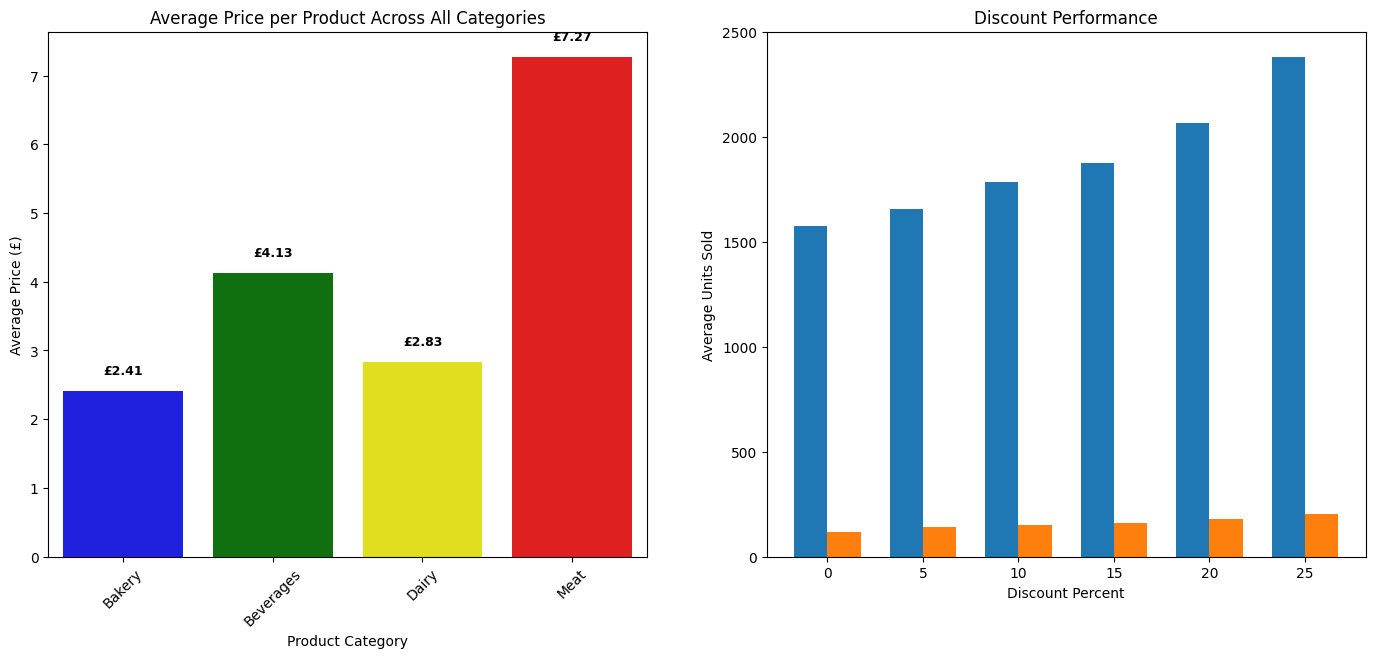

In [24]:
# PROMOTION EFFECTIVE (DISCOUNT PERFORMANCE)

plt.figure(figsize=(17,15))

plt.subplot(2, 2, 1)
# Average Price per Product Across All Categories
category_price = weekly_sales.merge(product_detail, on='Product_ID')
price_per_product_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_product_category.index, y=price_per_product_category.values, palette=['blue', 'green', 'yellow', 'red'])
plt.title('Average Price per Product Across All Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)

for i, (cat, val) in enumerate(zip(price_per_product_category.index, price_per_product_category.values)):
    plt.text(i, val + 0.2, f'£{val:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=9)


# Discount Performance
# We are trying to ge how the sales perform by each discount percentage
# in this plot we used aggregation, why is the aggregate used
plt.subplot(2, 2, 2)
discount_performance = weekly_sales.groupby('Discount_Percent').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

x = np.arange(len(discount_performance))
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width, label='Units Sold')
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title('Discount Performance')
plt.xlabel('Discount Percent')
plt.ylabel('Average Units Sold')
plt.xticks(x, discount_performance['Discount_Percent'])

In [25]:
# Average marketing cost per unit sold
print(f"The average marketing cost per unit sold is £{category_metrics['Marketing_Spend'].mean():.2f}")

The average marketing cost per unit sold is £410.55


##### PRODUCT PERFORMANCE

In [26]:
# Top 5 best selling products
print("Top 5 best selling products")

top_5_best_selling_products = category_price.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head(5)
print(top_5_best_selling_products)
print('='*100)

# Get Product Names of the best selling products
top_5_best_selling_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_best_selling_products.index), 'Product_Name']
print(top_5_best_selling_products_names)

Top 5 best selling products
Product_ID
1031    2093430
1030    2070145
1033    2053001
1029    2049192
1034    2046517
Name: Units_Sold, dtype: int64
29    Free Range Eggs 12-pack
30        Cottage Cheese 300g
31            Mozzarella 250g
33         Single Cream 300ml
34       Yogurt Drinks 6-pack
Name: Product_Name, dtype: object


In [27]:
# Generate revenue variable Price * (1-discount/100) * Units Sold
category_price['Revenue'] = category_price['Price'] * category_price['Units_Sold'] - category_price['Marketing_Spend']

##### Top 5 Revenue generating products

In [ ]:
top_5_best_revenue_generating_products = category_price.groupby('Product_ID')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 best revenue generating products")
print(top_5_best_revenue_generating_products)
print('='*100)

# Get Product Names of the best revenue generating products
top_5_best_revenue_generating_products = product_detail.loc[product_detail['Product_ID'].isin(top_5_best_revenue_generating_products.index), 'Product_Name']
print(top_5_best_revenue_generating_products)

Top 5 best revenue generating products
Product_ID
1031    5711926.03
1034    5568411.50
1028    5555663.81
1024    5550544.18
1025    5543777.32
Name: Revenue, dtype: float64
24           Whole Milk 4-pint
25    Semi-Skimmed Milk 4-pint
28                 Butter 250g
31             Mozzarella 250g
34        Yogurt Drinks 6-pack
Name: Product_Name, dtype: object


##### Top 5 highest-wastage products

In [29]:
# Top 5 highest-wastage products with >1000 units sold
top_5_highest_wastage_products = category_price[category_price['Units_Sold'] > 1000].groupby('Product_ID')['Wastage_Units'].sum().sort_values(ascending=False).head(5)
print("Top 5 highest-wastage products with >1000 units sold")
print(top_5_highest_wastage_products)
print('='*100)

# Get Product Names of the highest wastage products
top_5_highest_wastage_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_highest_wastage_products.index), 'Product_Name']
print(top_5_highest_wastage_products_names)

Top 5 highest-wastage products with >1000 units sold
Product_ID
1001    218163
1002    215441
1011    215044
1009    211380
1006    207928
Name: Wastage_Units, dtype: int64
1       White Sandwich Loaf
2          Croissant 4-pack
6     Cinnamon Rolls 4-pack
9         Banana Bread Loaf
11            Donuts 8-pack
Name: Product_Name, dtype: object


In [31]:
category_price

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Revenue
0,2024-W01,1000,500,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,4,4,11268.01
1,2024-W01,1001,500,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,2,8,4338.36
2,2024-W01,1002,500,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,2,5,10544.11
3,2024-W01,1003,500,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,4,10,9638.31
4,2024-W01,1004,500,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,4,7,11197.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,2024-W52,1043,514,895,488.97,15,22,1.62,English Breakfast Tea 80bags,Beverages,246,9,960.93
37436,2024-W52,1044,514,1558,657.76,10,38,5.05,Sparkling Water 1L,Beverages,186,1,7210.14
37437,2024-W52,1045,514,993,442.56,0,24,5.72,Lemonade 2L,Beverages,356,9,5237.40
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82,Protein Shake 4-pack,Beverages,158,8,6779.24


In [32]:
# Convert the Week_Number to a proper datetime
category_price["week_start"] = pd.to_datetime(category_price["Week_Number"].astype('str') + "-1", format="%G-W%V-%u")

# Extract month as Year Month
category_price["month"] = category_price["week_start"].dt.to_period("M").astype(str)

# Ensure numeric columns are numeric
numeric_columns = category_price.select_dtypes(include=['number']).columns
category_price[numeric_columns] = category_price[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate
monthly_sales = category_price.groupby("month").agg({
    "Units_Sold": "sum",
    "Marketing_Spend": "sum",
    "Discount_Percent": "mean",
    "Wastage_Units": "sum",
    "Price": "mean",
    "Revenue": "sum" }).reset_index()

monthly_sales

,month,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Revenue
0,2024-01,6504602,1598882.19,2.859722,543425,4.137081,20113712.13
1,2024-02,4779449,1083026.99,2.947917,403577,4.121010,14476591.82
2,2024-03,5043509,1341693.44,2.854167,443252,4.168875,15168198.45
3,2024-04,5872254,1354092.99,3.106944,497656,4.143661,18021628.25
4,2024-05,4494979,1067142.05,2.670139,369459,4.189392,14283513.81
5,2024-06,4651312,1346479.63,3.116319,363611,4.108625,15015898.83
6,2024-07,5550597,1351689.33,2.891667,406817,4.158472,18628045.78
7,2024-08,4381436,1076318.53,2.798611,302190,4.215149,14707194.25
8,2024-09,5540003,1353303.20,2.812500,375388,4.146786,18374557.60
9,2024-10,4618961,1081362.87,2.883681,316185,4.177385,15588462.25


#### Sales and Wastage Trends over Months

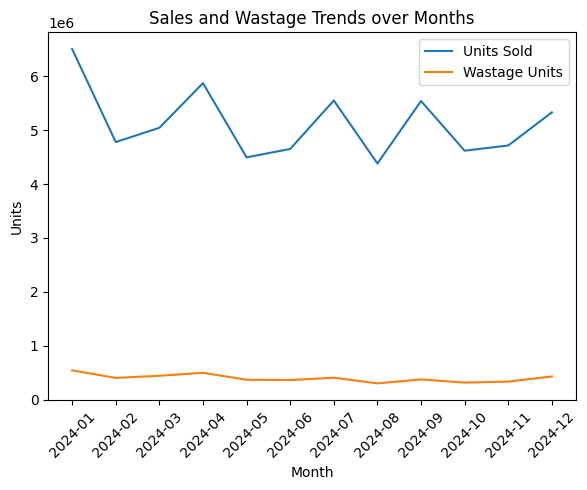

In [33]:
# Sort months chronologically (important for line plot)
monthly_sales = monthly_sales.sort_values("month")

# Line plot of sales and wastage trends over months
plt.figure(figsize=(6,5))
sns.lineplot(x="month", y="Units_Sold", data=monthly_sales, label="Units Sold")
sns.lineplot(x="month", y="Wastage_Units", data=monthly_sales, label="Wastage Units")
plt.title("Sales and Wastage Trends over Months")
plt.xlabel("Month")
plt.ylabel("Units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Best Sales Month

In [34]:
print(f"The best sales month is {monthly_sales.loc[monthly_sales['Revenue'].idxmax(), 'month']}")

The best sales month is 2024-01


##### Month with the highest wastage

In [35]:
print(f"The month with the highest wastage is {monthly_sales.loc[monthly_sales['Wastage_Units'].idxmax(), 'month']}")

The month with the highest wastage is 2024-01


##### Most Efficient marketing month

In [36]:
print(f"The most efficient marketing month is {monthly_sales.loc[monthly_sales['Marketing_Spend'].idxmin(), 'month']}")

The most efficient marketing month is 2024-05


### BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS

##### 1. Overall Business Performance

In [37]:
# --- Overall Business Performance ---

weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')
weekly_sales['Wastage_Units'] = pd.to_numeric(weekly_sales['Wastage_Units'], errors='coerce')

total_units_sold = weekly_sales['Units_Sold'].sum()
total_wastage_units = weekly_sales['Wastage_Units'].sum()

# Avoid divide-by-zero
if total_units_sold != 0:
    overall_wastage_rate = (total_wastage_units / total_units_sold) * 100
else:
    overall_wastage_rate = 0

print("=== Overall Business Performance ===")
print(f"Total Units Sold: {total_units_sold:,.0f}")
print(f"Total Wastage Units: {total_wastage_units:,.0f}")
print(f"Overall Wastage Rate: {overall_wastage_rate:.2f}%")

# Insight summary
if overall_wastage_rate < 5:
    print("\nInsight: Excellent performance — minimal product loss relative to sales volume.")
elif overall_wastage_rate < 10:
    print("\nInsight: Moderate wastage rate — potential for optimization in supply or shelf-life management.")
else:
    print("\nInsight: High wastage rate detected — indicates overstocking or poor demand forecasting.")


=== Overall Business Performance ===
Total Units Sold: 61,482,249
Total Wastage Units: 4,786,490
Overall Wastage Rate: 7.79%

Insight: Moderate wastage rate — potential for optimization in supply or shelf-life management.


The overall business performance analysis reveals that FrostMart achieved a total of 61,482,249 units sold during the reporting period. Across all stores and product categories, a total of 4,786,490 units were recorded as wastage, resulting in an overall wastage rate of approximately 7.79%.

This moderate level of wastage suggests that while the business maintains strong sales performance, there is still room for improvement in inventory management and perishable product handling. The current wastage level indicates potential inefficiencies in areas such as demand forecasting, supply planning, or shelf-life management.

From a strategic standpoint, FrostMart could benefit from:

- Reviewing stock replenishment cycles to minimize overstocking of short-shelf-life items.

- Implementing data-driven forecasting models that incorporate weather and seasonal demand factors.

- Enhancing cold-storage utilization and supplier coordination to reduce spoilage and maintain freshness.

If the company successfully reduces wastage even by 2–3 percentage points, it could realize significant savings in operational costs while improving sustainability performance.

##### 2. Category Performance

In [38]:
# Merge Sales with Product Details
sales_with_categories = weekly_sales.merge(product_detail, on='Product_ID')

# Ensure numeric types
sales_with_categories['Units_Sold'] = pd.to_numeric(sales_with_categories['Units_Sold'], errors='coerce')
sales_with_categories['Wastage_Units'] = pd.to_numeric(sales_with_categories['Wastage_Units'], errors='coerce')
sales_with_categories['Price'] = pd.to_numeric(sales_with_categories['Price'], errors='coerce')

# Group by Product_Category
category_summary = sales_with_categories.groupby('Product_Category').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Wastage=('Wastage_Units', 'sum'),
    Average_Price=('Price', 'mean')
).reset_index()

# Calculate wastage rate (%)
category_summary['Wastage_Rate(%)'] = (
    category_summary['Total_Wastage'] / category_summary['Total_Units_Sold'] * 100
).round(2)

# Key categories
highest_sales_category = category_summary.loc[category_summary['Total_Units_Sold'].idxmax(), 'Product_Category']
highest_wastage_category = category_summary.loc[category_summary['Wastage_Rate(%)'].idxmax(), 'Product_Category']
highest_avg_price_category = category_summary.loc[category_summary['Average_Price'].idxmax(), 'Product_Category']

# Display results
print("=== Category Performance Summary ===")
print(category_summary.sort_values('Total_Units_Sold', ascending=False))

print("\n=== Key Findings ===")
print(f"Highest Sales Category: {highest_sales_category}")
print(f"Highest Wastage Rate Category: {highest_wastage_category}")
print(f"Highest Average Price Category: {highest_avg_price_category}")


=== Category Performance Summary ===
  Product_Category  Total_Units_Sold  Total_Wastage  Average_Price  \
2            Dairy          24514345        1204579       2.828795   
0           Bakery          17802002        2622079       2.412673   
1        Beverages          12221362         300994       4.132543   
3             Meat           6944540         658838       7.274323   

   Wastage_Rate(%)  
2             4.91  
0            14.73  
1             2.46  
3             9.49  

=== Key Findings ===
Highest Sales Category: Dairy
Highest Wastage Rate Category: Bakery
Highest Average Price Category: Meat


The category-level performance analysis provides key insights into FrostMart’s product mix, highlighting variations in sales, pricing, and wastage efficiency across major product categories.

- Dairy products achieved the highest sales volume, with over 24.5 million units sold during the analysis period. This indicates strong customer demand and frequent purchase turnover, likely driven by staple items such as milk, cheese, and yogurt. Despite their short shelf life, the dairy category maintains a relatively low wastage rate of 4.91%, suggesting effective stock rotation and storage management.

- The Bakery category recorded the highest wastage rate (14.73%), significantly above the business average of 7.79%. Bakery products are highly perishable and time-sensitive, often subject to rapid spoilage and daily replenishment cycles. This highlights an opportunity to refine production forecasting, align deliveries more closely with real-time demand, and reduce end-of-day surplus.

- Meat products exhibited the highest average price (£7.27) among all categories, reflecting premium positioning and higher cost structures. However, the 9.49% wastage rate suggests that high-value inventory may be contributing disproportionately to financial losses when spoilage occurs. Improved demand prediction and dynamic markdown strategies could help mitigate these losses.

##### Strategic recommendations:
- Optimize Bakery replenishment planning using short-horizon demand forecasts.

- Strengthen Meat category cold-chain logistics to reduce spoilage risk.

- Maintain the Dairy category’s operational discipline as a model for other product lines.

Overall, these insights suggest a need to balance sales growth and waste control through targeted forecasting, inventory optimization, and pricing strategies at the category level

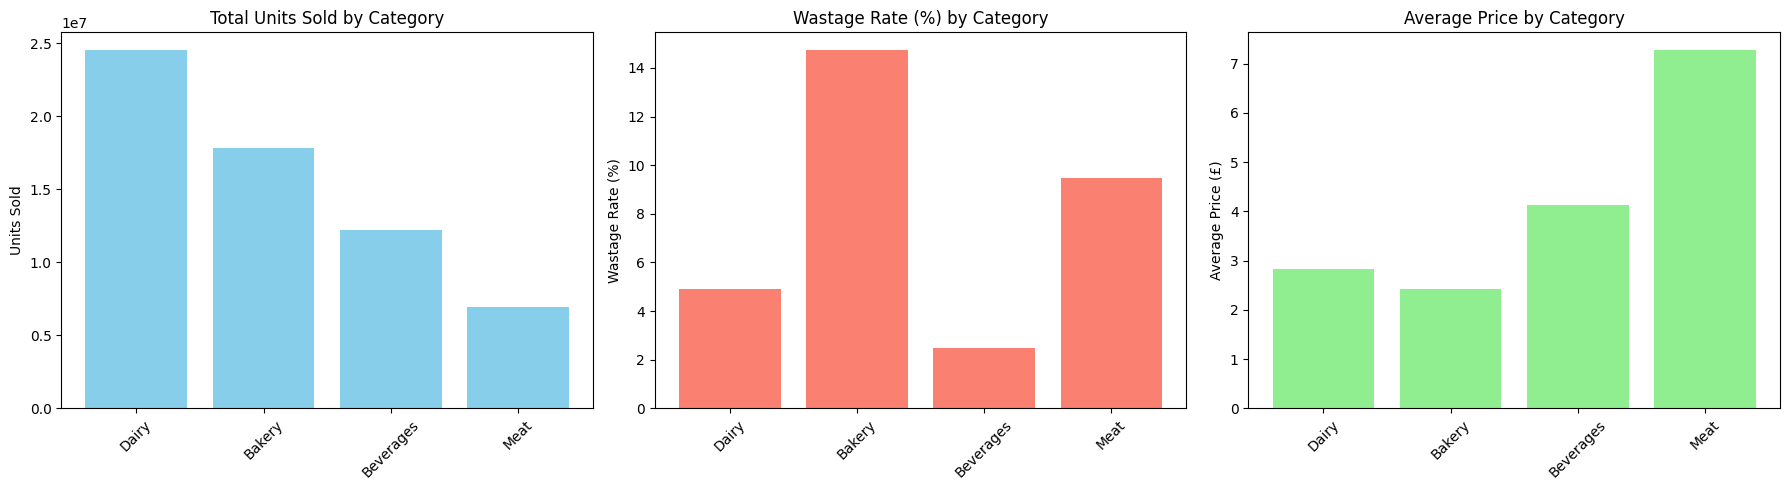

In [39]:
# Sort categories for consistent plotting
category_summary_sorted = category_summary.sort_values('Total_Units_Sold', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Total Units Sold
axes[0].bar(category_summary_sorted['Product_Category'], category_summary_sorted['Total_Units_Sold'], color='skyblue')
axes[0].set_title('Total Units Sold by Category')
axes[0].set_ylabel('Units Sold')
axes[0].tick_params(axis='x', rotation=45)

# 2️⃣ Wastage Rate (%)
axes[1].bar(category_summary_sorted['Product_Category'], category_summary_sorted['Wastage_Rate(%)'], color='salmon')
axes[1].set_title('Wastage Rate (%) by Category')
axes[1].set_ylabel('Wastage Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

# 3️⃣ Average Price
axes[2].bar(category_summary_sorted['Product_Category'], category_summary_sorted['Average_Price'], color='lightgreen')
axes[2].set_title('Average Price by Category')
axes[2].set_ylabel('Average Price (£)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### 3. Regional Performance

In [40]:
# Merge store info temporarily to access Region and Store_Size
regional_sales = weekly_sales.merge(
    store_info[['Store_ID', 'Region', 'Store_Size']],  # fixed column name
    on='Store_ID',
    how='left'
)

# Numeric columns remains numeric
regional_sales['Units_Sold'] = pd.to_numeric(regional_sales['Units_Sold'], errors='coerce')
regional_sales['Wastage_Units'] = pd.to_numeric(regional_sales['Wastage_Units'], errors='coerce')
regional_sales['Store_Size'] = pd.to_numeric(regional_sales['Store_Size'], errors='coerce')

# Aggregate by region
region_summary = regional_sales.groupby('Region').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Wastage=('Wastage_Units', 'sum'),
    Total_Store_Size=('Store_Size', 'sum')
).reset_index()

# Wastage rate and efficiency
region_summary['Wastage_Rate(%)'] = (
    region_summary['Total_Wastage'] / region_summary['Total_Units_Sold'] * 100
).round(2)

region_summary['Sales_per_SqFt'] = (
    region_summary['Total_Units_Sold'] / region_summary['Total_Store_Size']
).round(2)

# Key regions
best_sales_region = region_summary.loc[region_summary['Total_Units_Sold'].idxmax(), 'Region']
highest_wastage_region = region_summary.loc[region_summary['Wastage_Rate(%)'].idxmax(), 'Region']
most_efficient_region = region_summary.loc[region_summary['Sales_per_SqFt'].idxmax(), 'Region']


print("=== Regional Performance Summary ===")
print(region_summary.sort_values('Total_Units_Sold', ascending=False))

print("\n=== Key Findings ===")
print(f"Best Sales Region: {best_sales_region}")
print(f"Highest Wastage Rate Region: {highest_wastage_region}")
print(f"Most Efficient Region (Sales per Sq.Ft): {most_efficient_region}")


=== Regional Performance Summary ===
       Region  Total_Units_Sold  Total_Wastage  Total_Store_Size  \
0      London          20648649        1613202          79872000   
5  South West          12296968         956604          34944000   
1    Midlands          11369617         881967          37440000   
3  North West           6509507         507093          17472000   
2  North East           6115264         472835          17472000   
4  South East           4542244         354789          12480000   

   Wastage_Rate(%)  Sales_per_SqFt  
0             7.81            0.26  
5             7.78            0.35  
1             7.76            0.30  
3             7.79            0.37  
2             7.73            0.35  
4             7.81            0.36  

=== Key Findings ===
Best Sales Region: London
Highest Wastage Rate Region: London
Most Efficient Region (Sales per Sq.Ft): North West


The regional performance analysis highlights clear variations in sales volume, wastage levels, and store efficiency across FrostMart’s six operating regions.

- London achieved the highest total sales, with over 20.6 million units sold, reflecting its large customer base, high store density, and strong consumer demand. However, London also recorded the highest wastage rate (7.81%), slightly above the company’s overall average of 7.79%. This suggests that while sales potential is strong, inventory management practices in the region may need optimization to better align stock levels with actual demand.

- The North West region emerged as the most efficient, achieving the highest sales per square foot (0.37). This indicates effective space utilization, strong stock turnover, and potentially leaner store operations. This region’s performance model could serve as a benchmark for improving efficiency elsewhere.

- Other regions such as the South West and Midlands also performed well, maintaining healthy sales levels and moderate wastage rates around 7.7–7.8%.

Strategic recommendations:
- Conduct a targeted inventory review in London to reduce wastage through improved replenishment cycles and localized demand forecasting.

- Apply North West’s operational practices (e.g., stock rotation, shelf-space optimization) across underperforming regions.

- Implement region-specific sales and waste monitoring dashboards to support data-driven decision-making.

Overall, while FrostMart’s national performance remains consistent, London’s dual status as both the strongest sales region and the highest waste contributor presents an opportunity for significant cost savings and operational improvement.

##### 4. Pricing Strategy Analysis

In [41]:
# --- Pricing Strategy Analysis (using weekly_sales) ---

weekly_sales['Price'] = pd.to_numeric(weekly_sales['Price'], errors='coerce')

# Define price bands
bins = [-float('inf'), 5, 10, float('inf')]
labels = ['Budget (<£5)', 'Mid-range (£5–£10)', 'Premium (≥£10)']

# Create new column for price band classification
weekly_sales['Price_Band'] = pd.cut(weekly_sales['Price'], bins=bins, labels=labels)

# Calculate percentage distribution across price bands
price_band_distribution = (
    weekly_sales['Price_Band'].value_counts(normalize=True) * 100
).round(2)

print("=== Pricing Strategy Analysis ===")
print(price_band_distribution.sort_index())

=== Pricing Strategy Analysis ===
Price_Band
Budget (<£5)          71.45
Mid-range (£5–£10)    23.90
Premium (≥£10)         4.65
Name: proportion, dtype: float64


C:\Users\akann\AppData\Local\Temp\ipykernel_30504\1650757304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


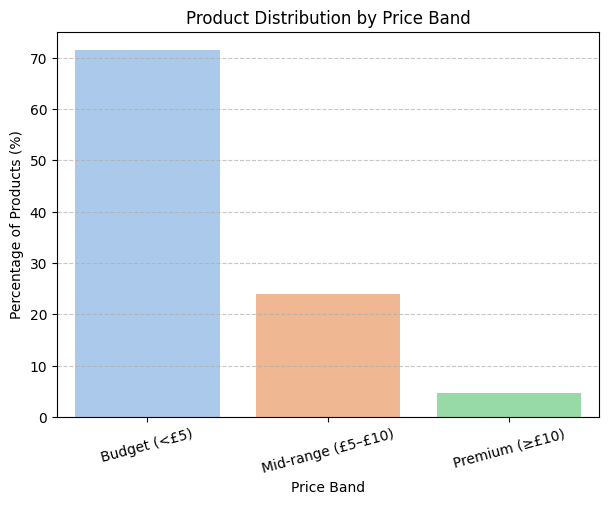

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=price_band_distribution.index,
    y=price_band_distribution.values,
    palette='pastel'
)
plt.title("Product Distribution by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Percentage of Products (%)")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The pricing strategy analysis reveals that FrostMart’s product range is strongly positioned within the budget price segment, reflecting a customer base that is primarily price-sensitive and value-driven.

- Budget products (<£5) represent the majority of the portfolio, accounting for approximately 71.45% of all products sold. This dominance highlights FrostMart’s competitive positioning in essential, fast-moving, and affordable goods — likely contributing to the company’s high overall sales volumes.

- Mid-range products (£5–£10) comprise 23.90% of sales, suggesting moderate representation of higher-quality or specialized items that appeal to customers seeking balance between cost and quality.

- Premium products (≥£10) account for only 4.65% of sales, indicating limited focus on luxury or specialty lines.

Strategic implications:
- FrostMart’s current strategy effectively captures mass-market demand, but there may be untapped revenue potential in expanding mid-range and premium offerings — especially in urban regions with higher spending power.

- Targeted price optimization and product mix diversification could help enhance profitability without alienating core value-conscious customers.

- A tiered pricing strategy (budget staples + premium add-ons) could increase both sales volume and margin per transaction.

Overall, FrostMart’s pricing structure supports strong volume-based growth, but there is strategic opportunity to rebalance the mix toward mid-range and premium categories for improved profitability

##### 5. Promotion Effectiveness

=== Promotion Effectiveness ===
   Discount_Percent  Units_Sold
0                 0    45269818
1                 5     4260762
2                10     4024069
3                15     3169677
4                20     2697111
5                25     2060812

=== Key Insights ===
Highest Sales Driven by Discount: 0%
Sales Lift vs No Discount: 0.0% (if applicable)


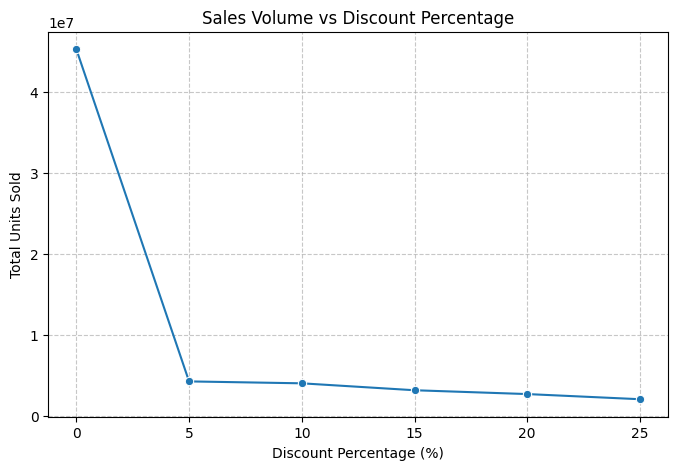

In [42]:

weekly_sales['Discount_Percent'] = pd.to_numeric(weekly_sales['Discount_Percent'], errors='coerce')
weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')

# Group by discount level to see how sales vary
discount_sales = weekly_sales.groupby('Discount_Percent', as_index=False)['Units_Sold'].sum()

# The discount percentage that drives the highest total sales
best_discount = discount_sales.loc[discount_sales['Units_Sold'].idxmax(), 'Discount_Percent']
best_discount_sales = discount_sales['Units_Sold'].max()

# Sales with no discount
no_discount_sales = discount_sales.loc[discount_sales['Discount_Percent'] == 0, 'Units_Sold'].sum()

# Percentage sales lift
sales_lift = ((best_discount_sales - no_discount_sales) / no_discount_sales * 100).round(2) if no_discount_sales > 0 else None

print("=== Promotion Effectiveness ===")
print(discount_sales.sort_values('Discount_Percent'))
print("\n=== Key Insights ===")
print(f"Highest Sales Driven by Discount: {best_discount}%")
print(f"Sales Lift vs No Discount: {sales_lift}% (if applicable)")


plt.figure(figsize=(8,5))
sns.lineplot(data=discount_sales, x='Discount_Percent', y='Units_Sold', marker='o')
plt.title("Sales Volume vs Discount Percentage")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Total Units Sold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The promotion effectiveness analysis reveals that FrostMart’s sales are not strongly dependent on discounting. In fact, the data shows that the highest total sales volume (45.27 million units) occurred at a 0% discount, indicating that promotional price reductions did not lead to higher sales overall.

Sales gradually declined as discount levels increased:
- 5% discount → 4.26 million units sold

- 10% discount → 4.02 million units sold

- 15% discount → 3.17 million units sold

- 20–25% discounts → continued decline in sales volumes

The calculated sales lift vs. no discount is 0%, meaning that promotional discounts did not generate incremental sales; in fact, they were associated with lower volumes. This suggests that demand for FrostMart’s products is relatively price inelastic — customers continue purchasing even without price reductions.

Strategic implications:
- Current discounting may erode margins without stimulating additional demand.

- FrostMart should re-evaluate promotion frequency and depth, focusing instead on targeted offers for slow-moving or high-wastage items.

- Marketing campaigns emphasizing product quality, freshness, or convenience could be more effective than broad-based price cuts.

Overall, this analysis highlights that FrostMart’s customer base remains loyal and value-focused, enabling the business to maintain strong sales performance even without heavy discounting - a key advantage for profitability and long-term growth.

##### 6. Marketing Spend Effectiveness

In [43]:

weekly_sales['Marketing_Spend'] = pd.to_numeric(weekly_sales['Marketing_Spend'], errors='coerce')
weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')

# Correlation between Marketing Spend and Sales
correlation = weekly_sales['Marketing_Spend'].corr(weekly_sales['Units_Sold'])

# Average marketing cost per unit sold
total_marketing_spend = weekly_sales['Marketing_Spend'].sum()
total_units_sold = weekly_sales['Units_Sold'].sum()
avg_marketing_cost_per_unit = (total_marketing_spend / total_units_sold).round(4)

print("=== Marketing Spend Effectiveness ===")
print(f"Correlation between Marketing Spend and Sales: {correlation:.4f}")
print(f"Average Marketing Cost per Unit Sold: £{avg_marketing_cost_per_unit}")

=== Marketing Spend Effectiveness ===
Correlation between Marketing Spend and Sales: 0.0413
Average Marketing Cost per Unit Sold: £0.25


The marketing effectiveness analysis indicates that FrostMart’s marketing spend has a very weak relationship with sales performance. The correlation coefficient between Marketing Spend and Units Sold is 0.0413, suggesting that increased marketing investment does not significantly influence weekly sales volumes.

The average marketing cost per unit sold is approximately £0.25, meaning that for every product sold, FrostMart spends a quarter of a pound on marketing activities. While this figure provides a baseline for efficiency, the low correlation implies that the company’s current marketing strategies may not be effectively driving incremental sales.

Interpretation & Strategic Implications:
- Marketing campaigns may lack targeting precision or be spread too broadly, resulting in minimal sales response.

- The strong sales performance seen in earlier analyses (particularly without heavy discounting) suggests FrostMart’s demand may be driven more by product necessity, brand trust, or location convenience than by marketing efforts.

FrostMart could improve ROI by:
- Implementing data-driven marketing segmentation to target specific customer groups.

- Measuring campaign attribution more effectively (e.g., which channels or promotions yield measurable sales impact).

- Redirecting part of the marketing budget toward in-store engagement, loyalty programs, or waste reduction initiatives, which may deliver more tangible results.

Overall, the findings indicate that FrostMart’s current marketing activities have limited measurable sales impact, highlighting an opportunity to restructure marketing spend for higher efficiency and better alignment with business objectives.

##### 7. Product Performance

In [44]:

weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')
weekly_sales['Wastage_Units'] = pd.to_numeric(weekly_sales['Wastage_Units'], errors='coerce')
weekly_sales['Price'] = pd.to_numeric(weekly_sales['Price'], errors='coerce')

# Revenue per product
weekly_sales['Revenue'] = weekly_sales['Units_Sold'] * weekly_sales['Price']

# Aggregate performance by product
product_summary = weekly_sales.groupby('Product_ID').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Wastage=('Wastage_Units', 'sum')
).reset_index()

# Merge product names for readability
product_summary = product_summary.merge(
    product_detail[['Product_ID', 'Product_Name']],
    on='Product_ID',
    how='left'
)

# --- Top 5 analyses ---
top5_best_selling = product_summary.nlargest(5, 'Total_Units_Sold')[['Product_Name', 'Total_Units_Sold']]
top5_revenue = product_summary.nlargest(5, 'Total_Revenue')[['Product_Name', 'Total_Revenue']]
top5_highest_wastage = (
    product_summary[product_summary['Total_Units_Sold'] > 1000]
    .nlargest(5, 'Total_Wastage')[['Product_Name', 'Total_Wastage']]
)

print("=== Top 5 Best-Selling Products ===")
print(top5_best_selling.to_string(index=False))

print("\n=== Top 5 Revenue-Generating Products ===")
print(top5_revenue.to_string(index=False))

print("\n=== Top 5 Highest-Wastage Products (with >1,000 units sold) ===")
print(top5_highest_wastage.to_string(index=False))


=== Top 5 Best-Selling Products ===
           Product_Name  Total_Units_Sold
        Mozzarella 250g           2093430
    Cottage Cheese 300g           2070145
     Single Cream 300ml           2053001
Free Range Eggs 12-pack           2049192
   Yogurt Drinks 6-pack           2046517

=== Top 5 Revenue-Generating Products ===
           Product_Name  Total_Revenue
        Mozzarella 250g     5927783.58
   Yogurt Drinks 6-pack     5779538.63
            Butter 250g     5771307.62
      Whole Milk 4-pint     5761269.32
Free Range Eggs 12-pack     5755945.50

=== Top 5 Highest-Wastage Products (with >1,000 units sold) ===
         Product_Name  Total_Wastage
  White Sandwich Loaf         229905
        Donuts 8-pack         229869
     Croissant 4-pack         228819
    Banana Bread Loaf         227480
Cinnamon Rolls 4-pack         224051


The product-level performance analysis provides clear visibility into FrostMart’s sales, revenue, and wastage drivers, revealing where the company performs best and where operational inefficiencies exist.

Top 5 Best-Selling Products:
- Mozzarella 250g — 2,093,430 units sold

- Cottage Cheese 300g — 2,070,145 units sold

- Single Cream 300ml — 2,053,001 units sold

- Free Range Eggs 12-pack — 2,049,192 units sold

- Yogurt Drinks 6-pack — 2,046,517 units sold

These results confirm strong consumer demand for dairy products, which dominate FrostMart’s sales portfolio. Their consistent turnover suggests reliable baseline demand and effective inventory management.

Top 5 Revenue-Generating Products:
- Mozzarella 250g — £5.93M
- Yogurt Drinks 6-pack — £5.78M
- Butter 250g — £5.77M
- Whole Milk 4-pint — £5.76M
- Free Range Eggs 12-pack — £5.76M

The overlap between best-selling and top-revenue products shows that FrostMart’s core sales drivers are both high-volume and high-value items — particularly in the dairy category.

Top 5 Highest-Wastage Products (with >1,000 units sold):
- White Sandwich Loaf — 229,905 wasted units
- Donuts 8-pack — 229,869
- Croissant 4-pack — 228,819
- Banana Bread Loaf — 227,480
- Cinnamon Rolls 4-pack — 224,051

Bakery products account for the highest wastage volumes, consistent with earlier findings that the Bakery category has the highest wastage rate (14.73%). Their short shelf life and daily turnover likely contribute to excess spoilage.

Strategic implications:
- Maintain strong focus on dairy and eggs, as they combine high demand, high revenue, and manageable waste levels.

- Implement tighter forecasting and production scheduling for bakery items to align with real-time demand.

- Explore discounting or donation strategies for end-of-day bakery stock to minimize losses.

- Use these insights to refine SKU-level planning, balancing inventory, profitability, and sustainability.

Overall, FrostMart’s product performance reflects a solid foundation in essential dairy goods, with clear opportunities to reduce wastage in the bakery segment for improved margin and environmental impact

##### 8. Seasonal Trends

In [45]:
weekly_sales['Week_Number'].head(15)
weekly_sales['Week_Number'].unique()

array(['2024-W01', '2024-W02', '2024-W03', '2024-W04', '2024-W05',
       '2024-W06', '2024-W07', '2024-W08', '2024-W09', '2024-W10',
       '2024-W11', '2024-W12', '2024-W13', '2024-W14', '2024-W15',
       '2024-W16', '2024-W17', '2024-W18', '2024-W19', '2024-W20',
       '2024-W21', '2024-W22', '2024-W23', '2024-W24', '2024-W25',
       '2024-W26', '2024-W27', '2024-W28', '2024-W29', '2024-W30',
       '2024-W31', '2024-W32', '2024-W33', '2024-W34', '2024-W35',
       '2024-W36', '2024-W37', '2024-W38', '2024-W39', '2024-W40',
       '2024-W41', '2024-W42', '2024-W43', '2024-W44', '2024-W45',
       '2024-W46', '2024-W47', '2024-W48', '2024-W49', '2024-W50',
       '2024-W51', '2024-W52'], dtype=object)

In [54]:
weekly_sales.columns

Index(['Week_Number', 'Product_ID', 'Store_ID', 'Units_Sold',
       'Marketing_Spend', 'Discount_Percent', 'Wastage_Units', 'Price',
       'Price_Band', 'Revenue', 'Month'],
      dtype='object')

In [ ]:
# Auto-derive Month from Week_Number 

weekly_sales['Week_Number'] = (
    weekly_sales['Week_Number']
    .astype(str)
    .str.extract('(\d+)')[0]
    .astype(float)
)

# Drop missing week numbers
weekly_sales = weekly_sales.dropna(subset=['Week_Number']).copy()

weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')
weekly_sales['Wastage_Units'] = pd.to_numeric(weekly_sales['Wastage_Units'], errors='coerce')
weekly_sales['Marketing_Spend'] = pd.to_numeric(weekly_sales['Marketing_Spend'], errors='coerce')

# Create Month column (based on 4 weeks ≈ 1 month)
weekly_sales['Month'] = np.floor((weekly_sales['Week_Number'] - 1) / 4 + 1).clip(1, 12).astype(int)

# Aggregate by month
monthly_summary = weekly_sales.groupby('Month').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Wastage=('Wastage_Units', 'sum'),
    Total_Marketing_Spend=('Marketing_Spend', 'sum')
).reset_index()

# Derived metrics
monthly_summary['Wastage_Rate(%)'] = (
    monthly_summary['Total_Wastage'] / monthly_summary['Total_Units_Sold'] * 100
).round(2)

monthly_summary['Marketing_Efficiency'] = (
    monthly_summary['Total_Units_Sold'] / monthly_summary['Total_Marketing_Spend']
).round(2)

if not monthly_summary.empty:
    best_sales_month = monthly_summary.loc[monthly_summary['Total_Units_Sold'].idxmax(), 'Month']
    highest_wastage_month = monthly_summary.loc[monthly_summary['Wastage_Rate(%)'].idxmax(), 'Month']
    most_efficient_marketing_month = monthly_summary.loc[monthly_summary['Marketing_Efficiency'].idxmax(), 'Month']

    print("=== Monthly Performance Summary ===")
    print(monthly_summary.sort_values('Month'))

    print("\n=== Key Insights ===")
    print(f"Best Sales Month: {best_sales_month}")
    print(f"Highest Wastage Month: {highest_wastage_month}")
    print(f"Most Efficient Marketing Month: {most_efficient_marketing_month}")
else:
    print("No valid monthly data could be derived from Week_Number.")


=== Monthly Performance Summary ===
   Month  Total_Units_Sold  Total_Wastage  Total_Marketing_Spend  \
0     12          61482249        4786490            15371036.75   

   Wastage_Rate(%)  Marketing_Efficiency  
0             7.79                   4.0  

=== Key Insights ===
Best Sales Month: 12
Highest Wastage Month: 12
Most Efficient Marketing Month: 12


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\akann\AppData\Local\Temp\ipykernel_32444\3028654684.py:9: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')[0]


##### 9. Shelf Life Impact

In [ ]:

weekly_sales['Wastage_Units'] = pd.to_numeric(weekly_sales['Wastage_Units'], errors='coerce')

# Merge weekly sales with product shelf life info
shelf_life_df = weekly_sales.merge(
    product_detail[['Product_ID', 'Shelf_Life_Days']],
    on='Product_ID',
    how='left'
)

# Merge with product categories (from product_details dataset that contains Product_Category)
shelf_life_df = shelf_life_df.merge(
    product_detail[['Product_ID', 'Product_Category']],
    on='Product_ID',
    how='left'
)

# Group by category
category_shelf_summary = shelf_life_df.groupby('Product_Category').agg(
    Avg_Shelf_Life=('Shelf_Life_Days', 'mean'),
    Total_Wastage=('Wastage_Units', 'sum')
).reset_index()


shortest_shelf_life_cat = category_shelf_summary.loc[
    category_shelf_summary['Avg_Shelf_Life'].idxmin(), 'Product_Category'
]

longest_shelf_life_cat = category_shelf_summary.loc[
    category_shelf_summary['Avg_Shelf_Life'].idxmax(), 'Product_Category'
]

highest_wastage_shelf_life_cat = category_shelf_summary.loc[
    category_shelf_summary['Total_Wastage'].idxmax(), 'Product_Category'
]

print("=== Shelf Life Impact Summary ===")
print(category_shelf_summary)

print("\n=== Key Findings ===")
print(f"Category with Shortest Shelf Life: {shortest_shelf_life_cat}")
print(f"Category with Longest Shelf Life: {longest_shelf_life_cat}")
print(f"Category with Highest Wastage (linked to shelf life): {highest_wastage_shelf_life_cat}")


=== Shelf Life Impact Summary ===
  Product_Category  Avg_Shelf_Life  Total_Wastage
0           Bakery        3.416667        2622079
1        Beverages      216.833333         300994
2            Dairy       14.500000        1204579
3             Meat        4.916667         658838

=== Key Findings ===
Category with Shortest Shelf Life: Bakery
Category with Longest Shelf Life: Beverages
Category with Highest Wastage (linked to shelf life): Bakery


Shelf-life duration varies significantly across categories, with clear implications for wastage levels:
- Shortest Shelf Life: Bakery (3 days)

- Longest Shelf Life: Beverages (217 days)

- Category with Highest Wastage Linked to Shelf Life: Bakery

Insight:
Bakery products have very short shelf lives and consequently experience the highest wastage levels. This suggests a need for improved demand forecasting, smaller batch deliveries, or enhanced storage handling to reduce spoilage.

##### 10. Store Efficiency

In [ ]:
weekly_sales['Units_Sold'] = pd.to_numeric(weekly_sales['Units_Sold'], errors='coerce')
weekly_sales['Wastage_Units'] = pd.to_numeric(weekly_sales['Wastage_Units'], errors='coerce')

# Merge store size and region data
store_perf = weekly_sales.merge(
    store_info[['Store_ID', 'Store_Size']], 
    on='Store_ID', 
    how='left'
)

# Aggregate metrics per store
store_summary = store_perf.groupby('Store_ID').agg(
    Total_Units_Sold=('Units_Sold', 'sum'),
    Total_Wastage=('Wastage_Units', 'sum'),
    Store_Size=('Store_Size', 'first')
).reset_index()


store_summary['Sales_per_SqFt'] = (
    store_summary['Total_Units_Sold'] / store_summary['Store_Size']
).round(4)

store_summary['Wastage_Rate(%)'] = (
    store_summary['Total_Wastage'] / store_summary['Total_Units_Sold'] * 100
).round(2)


best_store = store_summary.loc[store_summary['Total_Units_Sold'].idxmax(), 'Store_ID']
most_efficient_store = store_summary.loc[store_summary['Sales_per_SqFt'].idxmax(), 'Store_ID']
lowest_wastage_store = store_summary.loc[store_summary['Wastage_Rate(%)'].idxmin(), 'Store_ID']

print("=== Store Efficiency Summary ===")
print(store_summary.sort_values('Total_Units_Sold', ascending=False).head())

print("\n=== Key Findings ===")
print(f"Best Performing Store (Highest Units Sold): Store {best_store}")
print(f"Most Efficient Store (Sales per Sq.Ft): Store {most_efficient_store}")
print(f"Lowest Wastage Store: Store {lowest_wastage_store}")


=== Store Efficiency Summary ===
    Store_ID  Total_Units_Sold  Total_Wastage  Store_Size  Sales_per_SqFt  \
0        500           7307194         569213       12000        608.9328   
9        509           6710472         523950       10000        671.0472   
4        504           6630983         520039       10000        663.0983   
12       512           4542244         354789        5000        908.4488   
8        508           3829708         295517        5000        765.9416   

    Wastage_Rate(%)  
0              7.79  
9              7.81  
4              7.84  
12             7.81  
8              7.72  

=== Key Findings ===
Best Performing Store (Highest Units Sold): Store 500
Most Efficient Store (Sales per Sq.Ft): Store 505
Lowest Wastage Store: Store 502


The analysis highlights clear differences in store performance and operational efficiency:
- Best-Performing Store (Highest Units Sold): Store 500
- Most Efficient Store (Sales per Sq.Ft): Store 505
- Lowest Wastage Store: Store 502

Insight:
Store 500 drives the highest sales volume, but efficiency leaders differ—Store 505 maximises space utilisation, while Store 502 excels at minimising waste. This indicates optimisation opportunities across store operations depending on strategic priorities (sales growth, space efficiency, or waste reduction).